<a href="https://colab.research.google.com/github/kieunseo/-/blob/main/%EA%B3%B5%EB%AA%A8%EC%A0%84/%EA%B2%BD%EC%83%81%EB%82%A8%EB%8F%84/%EB%8F%84%EB%A1%9C%EB%A7%9D_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/gboeing/osmnx-examples/tree/main


In [ ]:
!pip install OSMnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors

ox.config(use_cache=True, log_console=True)
ox.__version__

<ipython-input-3-4585bf3ea4fc>:7: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=True, log_console=True)


'1.9.3'

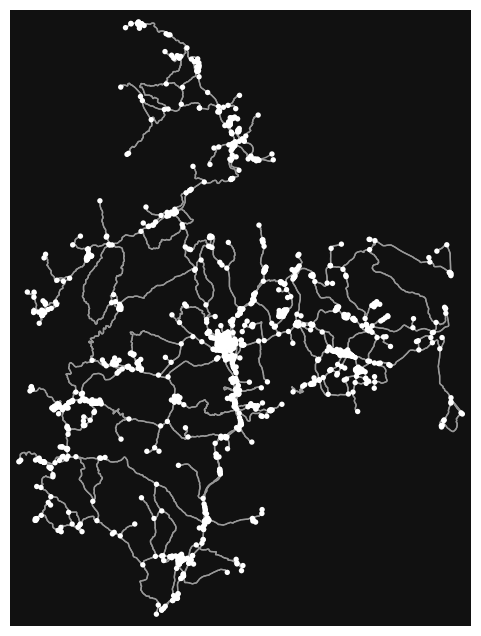

In [ ]:
# get a graph for some city
# www.openstreetmap.org에서 검색 결과가 city-state-country 단위로 나와야 함

G = ox.graph_from_place('합천군, 경상남도, 대한민국', network_type='drive')
fig, ax = ox.plot_graph(G)

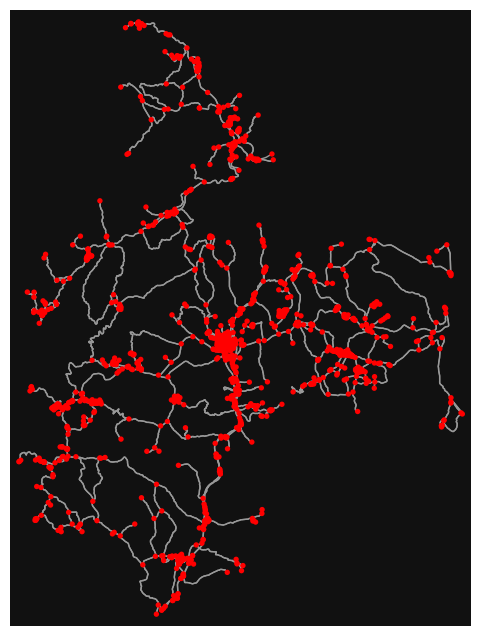

In [ ]:
fig, ax = ox.plot_graph(G, node_color='r')

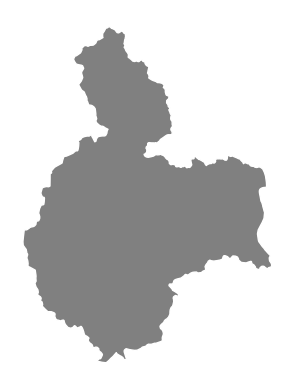

In [ ]:
city = ox.geocode_to_gdf('합천군, 경상남도, 대한민국')
proj_man = ox.project_gdf(city)
ax = proj_man.plot(fc='gray', ec='w')
_ = ax.axis('off')

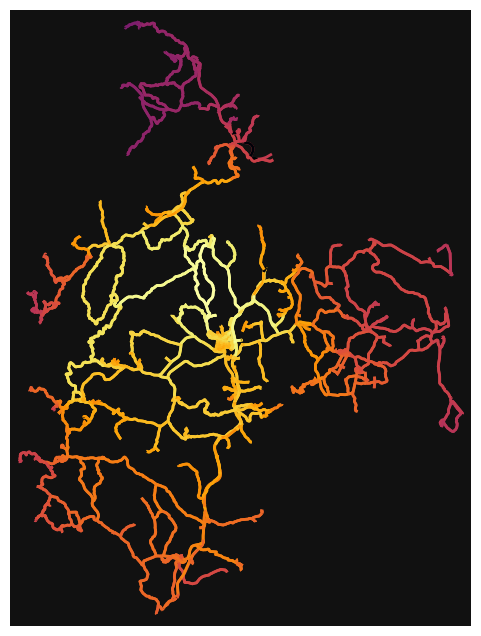

In [ ]:
# 도로망 중심성 시각화
# 노란색으로 칠해진 부분이 도로망 네트워크에 있어서 중심지 역할을 하는 곳

edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')


# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, 'edge_centrality', cmap='inferno')
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)